# Exercise 5.7

In [1]:
import pathlib
import numpy as np
import pandas as pd
from chapter_5_utils import simult_conf_int, bonferroni_conf_int, plot_confidence_ellipse

In [2]:
def load_data() -> pd.DataFrame:
    """
    Load the sweat data from Example 5.2.
    """
    keep_cols = ['Sweat Rate', 'Sodium', 'Potassium']
    sweat_pth = pathlib.Path('..\..\data\Table5.1.xlsx')
    return pd.read_excel(sweat_pth)[keep_cols]

In [3]:
sweat_df = load_data()
sweat_df.head(3)

,Sweat Rate,Sodium,Potassium
0,3.7,48.5,9.3
1,5.7,65.1,8.0
2,3.8,47.2,10.9


In [4]:
X = sweat_df.to_numpy()
n, p = X.shape
m = X.shape[1]
alpha = 0.05

In [5]:
simul_ci = simult_conf_int(X, alpha)
simul_ci

array([[ 3.3977679 ,  5.8822321 ],
       [35.05240823, 55.74759177],
       [ 8.57066448, 11.35933552]])

In [6]:
bonfer_ci = bonferroni_conf_int(X, m, alpha)
bonfer_ci

array([[ 3.64395158,  5.63604842],
       [37.10307834, 53.69692166],
       [ 8.84699179, 11.08300821]])

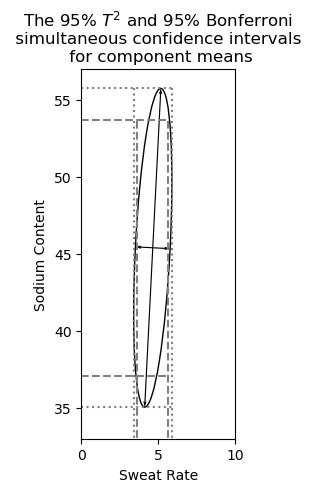

In [7]:
# Plot the simultaneous confidence ellipse for sweat rate vs sodium content.
# Also plot the lower and upper limits for 1D confidence values to show the projection.
xbar = np.mean(X, axis=0)
my_plot, ax = plot_confidence_ellipse(
    sweat_df[['Sweat Rate', 'Sodium']],
    n, p, alpha)
ax.set_title('The 95% $T^{2}$ and 95% Bonferroni \n simultaneous confidence intervals \n for component means')

# Draw dashed lines at the simultaneous T^2 values sweat rate.
ax.plot([simul_ci[0,0], simul_ci[0,0]], [0, simul_ci[1,1]], linestyle=':', color='gray', label='$T^{2}$')
ax.plot([simul_ci[0,1], simul_ci[0,1]], [0, simul_ci[1,1]], linestyle=':', color='gray')

# Draw dashed lines at the simultaneous T^2 values sodium content.
ax.plot([0, simul_ci[0,1]], [simul_ci[1,1], simul_ci[1,1]], linestyle=':', color='gray')
ax.plot([0, simul_ci[0,1]], [simul_ci[1,0], simul_ci[1,0]], linestyle=':', color='gray')

# Draw dashed lines at the simultaneous T^2 values sweat rate.
ax.plot([bonfer_ci[0,0], bonfer_ci[0,0]], [0, bonfer_ci[1,1]], linestyle='--', color='gray', label='$Bonferroni$')
ax.plot([bonfer_ci[0,1], bonfer_ci[0,1]], [0, bonfer_ci[1,1]], linestyle='--', color='gray')

# Draw dashed lines at the simultaneous T^2 values sodium content.
ax.plot([0, bonfer_ci[0,1]], [bonfer_ci[1,1], bonfer_ci[1,1]], linestyle='--', color='gray')
ax.plot([0, bonfer_ci[0,1]], [bonfer_ci[1,0], bonfer_ci[1,0]], linestyle='--', color='gray')

ax.set_xlim(0, 10)
ax.set_ylim(33, 57)
ax.set_aspect('equal')
my_plot.xlabel('Sweat Rate')
my_plot.ylabel('Sodium Content')

my_plot.savefig('Question-5-7-CI-Sweat-Sodium.png')
my_plot.show()

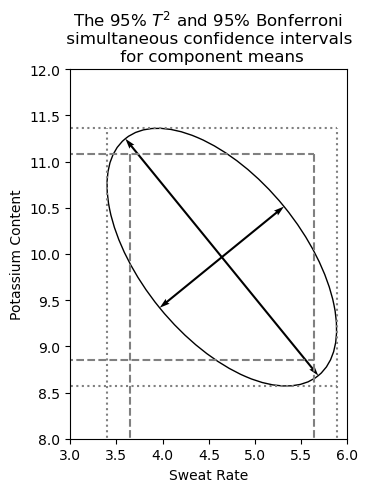

In [8]:
# Plot the simultaneous confidence ellipse for sweat rate vs potassium content.
# Also plot the lower and upper limits for 1D confidence values to show the projection.
my_plot, ax = plot_confidence_ellipse(
    sweat_df[['Sweat Rate', 'Potassium']],
    n, p, alpha=0.05)
ax.set_title('The 95% $T^{2}$ and 95% Bonferroni \n simultaneous confidence intervals \n for component means')

# Draw dashed lines at the simultaneous T^2 values sweat rate.
ax.plot([simul_ci[0,0], simul_ci[0,0]], [0, simul_ci[2,1]], linestyle=':', color='gray', label='$T^{2}$')
ax.plot([simul_ci[0,1], simul_ci[0,1]], [0, simul_ci[2,1]], linestyle=':', color='gray')

# Draw dashed lines at the simultaneous T^2 values potassium content.
ax.plot([0, simul_ci[0,1]], [simul_ci[2,1], simul_ci[2,1]], linestyle=':', color='gray')
ax.plot([0, simul_ci[0,1]], [simul_ci[2,0], simul_ci[2,0]], linestyle=':', color='gray')

# Draw dashed lines at the simultaneous T^2 values sweat rate.
ax.plot([bonfer_ci[0,0], bonfer_ci[0,0]], [0, bonfer_ci[2,1]], linestyle='--', color='gray', label='$Bonferroni$')
ax.plot([bonfer_ci[0,1], bonfer_ci[0,1]], [0, bonfer_ci[2,1]], linestyle='--', color='gray')

# Draw dashed lines at the simultaneous T^2 values potassium content.
ax.plot([0, bonfer_ci[0,1]], [bonfer_ci[2,1], bonfer_ci[2,1]], linestyle='--', color='gray')
ax.plot([0, bonfer_ci[0,1]], [bonfer_ci[2,0], bonfer_ci[2,0]], linestyle='--', color='gray')

ax.set_xlim(3, 6)
ax.set_ylim(8, 12)
ax.set_aspect('equal')
my_plot.xlabel('Sweat Rate')
my_plot.ylabel('Potassium Content')

my_plot.savefig('Question-5-7-CI-Sweat-Potassium.png')
my_plot.show()

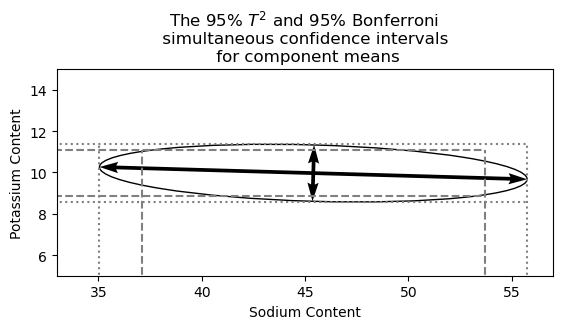

In [9]:
# Plot the simultaneous confidence ellipse for sodium content vs potassium content.
# Also plot the lower and upper limits for 1D confidence values to show the projection.
my_plot, ax = plot_confidence_ellipse(
    sweat_df[['Sodium', 'Potassium']],
    n, p, alpha=0.05)
ax.set_title('The 95% $T^{2}$ and 95% Bonferroni \n simultaneous confidence intervals \n for component means')

# Draw dashed lines at the simultaneous T^2 values sweat rate.
ax.plot([simul_ci[1,0], simul_ci[1,0]], [0, simul_ci[2,1]], linestyle=':', color='gray', label='$T^{2}$')
ax.plot([simul_ci[1,1], simul_ci[1,1]], [0, simul_ci[2,1]], linestyle=':', color='gray')

# Draw dashed lines at the simultaneous T^2 values potassium content.
ax.plot([0, simul_ci[1,1]], [simul_ci[2,1], simul_ci[2,1]], linestyle=':', color='gray')
ax.plot([0, simul_ci[1,1]], [simul_ci[2,0], simul_ci[2,0]], linestyle=':', color='gray')

# Draw dashed lines at the simultaneous T^2 values sweat rate.
ax.plot([bonfer_ci[1,0], bonfer_ci[1,0]], [0, bonfer_ci[2,1]], linestyle='--', color='gray', label='$Bonferroni$')
ax.plot([bonfer_ci[1,1], bonfer_ci[1,1]], [0, bonfer_ci[2,1]], linestyle='--', color='gray')

# Draw dashed lines at the simultaneous T^2 values potassium content.
ax.plot([0, bonfer_ci[1,1]], [bonfer_ci[2,1], bonfer_ci[2,1]], linestyle='--', color='gray')
ax.plot([0, bonfer_ci[1,1]], [bonfer_ci[2,0], bonfer_ci[2,0]], linestyle='--', color='gray')

ax.set_xlim(33, 57)
ax.set_ylim(5, 15)
ax.set_aspect('equal')
my_plot.xlabel('Sodium Content')
my_plot.ylabel('Potassium Content')

my_plot.savefig('Question-5-7-CI-Sodium-Potassium.png')
my_plot.show()